In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [9]:
def load_image(image_path):
    """ Load an image from a file path. """
    # return cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2HSV)
    return cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

def color_quantization(image, clusters):
    """ Reduce the number of colors using K-means clustering. """
    # Reshape the image to be a list of pixels
    pixels = image.reshape((-1, 3))
    
    # Perform K-means clustering to find cluster centers (the colors)
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(pixels)
    
    # Assign each pixel to the nearest cluster center
    colors = kmeans.cluster_centers_.astype(int)
    labels = kmeans.labels_
    quantized_image = colors[labels].reshape(image.shape)
    return quantized_image, labels, colors

def extract_color_patches(image, labels, colors):
    """ Extract patches based on the quantized colors. """
    patches = []
    mask = labels.reshape(image.shape[:2])  # reshape labels to the image size
    
    for color_index, color in enumerate(colors):
        # Create a mask for pixels assigned to this cluster
        component_mask = (mask == color_index).astype(np.uint8) * 255
        contours, _ = cv2.findContours(component_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Draw the contours on the image
        patch = np.zeros_like(image)
        cv2.drawContours(patch, contours, -1, color.tolist(), -1)
        patches.append(patch)
    
    return patches

def plot_results(images, titles):
    """ Plot a series of images. """
    plt.figure(figsize=(15, 5))
    for i, (image, title) in enumerate(zip(images, titles), 1):
        plt.subplot(1, len(images), i)
        # plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB))
        plt.imshow(image)
        plt.title(title)
        plt.axis('off')
    plt.show()

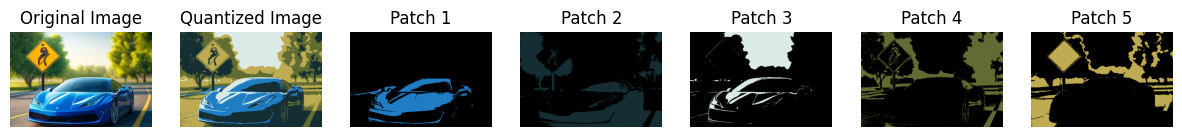

In [10]:
# Load your image
image = load_image('test2.jpg')

# Color quantization
quantized_image, labels, colors = color_quantization(image, clusters=5)

# Extract color patches
patches = extract_color_patches(image, labels, colors)

# Plotting the results
plot_results([image, quantized_image] + patches, ['Original Image', 'Quantized Image'] + [f'Patch {i+1}' for i in range(len(patches))])